# Tic-Tac-Toe Endgame
### Binary classification task on possible configurations of tic-tac-toe game
<br>

## Data Set Information:
This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row").

## Attribute Information:
1. top-left-square: {x,o,b}
2. top-middle-square: {x,o,b}
3. top-right-square: {x,o,b}
4. middle-left-square: {x,o,b}
5. middle-middle-square: {x,o,b}
6. middle-right-square: {x,o,b}
7. bottom-left-square: {x,o,b}
8. bottom-middle-square: {x,o,b}
9. bottom-right-square: {x,o,b}
10. Class: {positive,negative}

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df = pd.read_csv('Dataset/tic-tac-toe-endgame.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


# Exploratory Data Analysis

In [3]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


958 records are present in the dataset

In [4]:
# Check for missing values
df.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
dtype: int64

There are no null values

In [5]:
# Check for duplicate values
df.duplicated().sum()

0

No duplicate records are present

In [6]:
# Count the number of unique values in each column
df.nunique()

V1     3
V2     3
V3     3
V4     3
V5     3
V6     3
V7     3
V8     3
V9     3
V10    2
dtype: int64

Each attribute has 3 unique vales expect the last i.e. the target column that has 2 unique values: win (positive) or loose (negative).

<AxesSubplot:xlabel='V10', ylabel='count'>

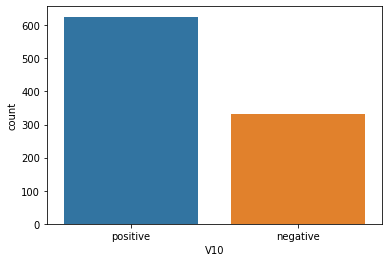

In [7]:
# Count plot for V10 (Winner)
sns.countplot(x='V10', data=df)

Player has won ~2x number of games than he lost.

# Preprocess the dataset before training

In [8]:
# Convert categorical variables to numeric
df['V10'] = df['V10'].astype('category').cat.codes

# Factorise categorical variables
df['V1'] = df['V1'].astype('category').cat.codes
df['V2'] = df['V2'].astype('category').cat.codes
df['V3'] = df['V3'].astype('category').cat.codes
df['V4'] = df['V4'].astype('category').cat.codes
df['V5'] = df['V5'].astype('category').cat.codes
df['V6'] = df['V6'].astype('category').cat.codes
df['V7'] = df['V7'].astype('category').cat.codes
df['V8'] = df['V8'].astype('category').cat.codes
df['V9'] = df['V9'].astype('category').cat.codes

In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


# Train Test Split

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def train_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
train_model(X_train, y_train, X_test, y_test, LogisticRegression())

Accuracy: 0.6770833333333334
Confusion Matrix:
[[ 18  56]
 [  6 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.24      0.37        74
           1       0.67      0.95      0.78       118

    accuracy                           0.68       192
   macro avg       0.71      0.60      0.58       192
weighted avg       0.70      0.68      0.62       192



In [13]:
# Support Vector Machine
from sklearn.svm import SVC
train_model(X_train, y_train, X_test, y_test, SVC())

Accuracy: 0.875
Confusion Matrix:
[[ 50  24]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        74
           1       0.83      1.00      0.91       118

    accuracy                           0.88       192
   macro avg       0.92      0.84      0.86       192
weighted avg       0.90      0.88      0.87       192



In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
train_model(X_train, y_train, X_test, y_test, RandomForestClassifier())

Accuracy: 0.9322916666666666
Confusion Matrix:
[[ 62  12]
 [  1 117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91        74
           1       0.91      0.99      0.95       118

    accuracy                           0.93       192
   macro avg       0.95      0.91      0.93       192
weighted avg       0.94      0.93      0.93       192



In [15]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier())

Accuracy: 0.9010416666666666
Confusion Matrix:
[[ 58  16]
 [  3 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        74
           1       0.88      0.97      0.92       118

    accuracy                           0.90       192
   macro avg       0.91      0.88      0.89       192
weighted avg       0.91      0.90      0.90       192



In [16]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier())

Accuracy: 0.84375
Confusion Matrix:
[[ 51  23]
 [  7 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        74
           1       0.83      0.94      0.88       118

    accuracy                           0.84       192
   macro avg       0.85      0.81      0.83       192
weighted avg       0.85      0.84      0.84       192



In [17]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
train_model(X_train, y_train, X_test, y_test, GaussianNB())

Accuracy: 0.6927083333333334
Confusion Matrix:
[[ 17  57]
 [  2 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.23      0.37        74
           1       0.67      0.98      0.80       118

    accuracy                           0.69       192
   macro avg       0.78      0.61      0.58       192
weighted avg       0.76      0.69      0.63       192



In [18]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
train_model(X_train, y_train, X_test, y_test, AdaBoostClassifier())

Accuracy: 0.7552083333333334
Confusion Matrix:
[[ 35  39]
 [  8 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.47      0.60        74
           1       0.74      0.93      0.82       118

    accuracy                           0.76       192
   macro avg       0.78      0.70      0.71       192
weighted avg       0.77      0.76      0.74       192



In [19]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
train_model(X_train, y_train, X_test, y_test, GradientBoostingClassifier())

Accuracy: 0.9270833333333334
Confusion Matrix:
[[ 62  12]
 [  2 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        74
           1       0.91      0.98      0.94       118

    accuracy                           0.93       192
   macro avg       0.94      0.91      0.92       192
weighted avg       0.93      0.93      0.93       192



In [20]:
# XGBoost
import xgboost as xgb
train_model(X_train, y_train, X_test, y_test, xgb.XGBClassifier())

[17:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9947916666666666
Confusion Matrix:
[[ 73   1]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.99      1.00      1.00       118

    accuracy                           0.99       192
   macro avg       1.00      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



In [21]:
# Gausian Process
from sklearn.gaussian_process import GaussianProcessClassifier
train_model(X_train, y_train, X_test, y_test, GaussianProcessClassifier())

Accuracy: 0.8072916666666666
Confusion Matrix:
[[ 39  35]
 [  2 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.53      0.68        74
           1       0.77      0.98      0.86       118

    accuracy                           0.81       192
   macro avg       0.86      0.76      0.77       192
weighted avg       0.84      0.81      0.79       192



In [22]:
# SGDClassifier
from sklearn.linear_model import SGDClassifier
train_model(X_train, y_train, X_test, y_test, SGDClassifier())

Accuracy: 0.6197916666666666
Confusion Matrix:
[[20 54]
 [19 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.27      0.35        74
           1       0.65      0.84      0.73       118

    accuracy                           0.62       192
   macro avg       0.58      0.55      0.54       192
weighted avg       0.60      0.62      0.59       192



In [23]:
# PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
train_model(X_train, y_train, X_test, y_test, PassiveAggressiveClassifier())

Accuracy: 0.5833333333333334
Confusion Matrix:
[[17 57]
 [23 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.23      0.30        74
           1       0.62      0.81      0.70       118

    accuracy                           0.58       192
   macro avg       0.53      0.52      0.50       192
weighted avg       0.55      0.58      0.55       192



In [24]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
train_model(X_train, y_train, X_test, y_test, MLPClassifier())

Accuracy: 0.8229166666666666
Confusion Matrix:
[[ 49  25]
 [  9 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        74
           1       0.81      0.92      0.87       118

    accuracy                           0.82       192
   macro avg       0.83      0.79      0.80       192
weighted avg       0.83      0.82      0.82       192



In [25]:
# Perceptron
from sklearn.linear_model import Perceptron
train_model(X_train, y_train, X_test, y_test, Perceptron())

Accuracy: 0.65625
Confusion Matrix:
[[ 17  57]
 [  9 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.23      0.34        74
           1       0.66      0.92      0.77       118

    accuracy                           0.66       192
   macro avg       0.66      0.58      0.55       192
weighted avg       0.66      0.66      0.60       192



In [26]:
# Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
# evaluate the model
scores = model.evaluate(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print('Accuracy of the model: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', cm)
print('Classification Report: \n', classification_report(y_test, y_pred))

Epoch 1/100
77/77 [==============================] - 55s 5ms/step - loss: 0.7301 - accuracy: 0.5981
Epoch 2/100
77/77 [==============================] - 0s 6ms/step - loss: 0.6527 - accuracy: 0.6345
Epoch 3/100
77/77 [==============================] - 0s 5ms/step - loss: 0.6373 - accuracy: 0.6413
Epoch 4/100
77/77 [==============================] - 0s 6ms/step - loss: 0.6315 - accuracy: 0.6394
Epoch 5/100
77/77 [==============================] - 0s 5ms/step - loss: 0.6291 - accuracy: 0.6795
Epoch 6/100
77/77 [==============================] - 1s 7ms/step - loss: 0.6076 - accuracy: 0.6547
Epoch 7/100
77/77 [==============================] - 0s 6ms/step - loss: 0.5798 - accuracy: 0.6979
Epoch 8/100
77/77 [==============================] - 0s 5ms/step - loss: 0.6101 - accuracy: 0.6608
Epoch 9/100
77/77 [==============================] - 0s 4ms/step - loss: 0.6029 - accuracy: 0.6664
Epoch 10/100
77/77 [==============================] - 0s 5ms/step - loss: 0.5484 - accuracy: 0.7129
Epoch 11

In [31]:
# Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
# 5 hidden layers neural network
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
# evaluate the model
scores = model.evaluate(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print('Accuracy of the model: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', cm)
print('Classification Report: \n', classification_report(y_test, y_pred))

Epoch 1/100
77/77 [==============================] - 8s 6ms/step - loss: 0.6521 - accuracy: 0.6505
Epoch 2/100
77/77 [==============================] - 0s 6ms/step - loss: 0.6168 - accuracy: 0.6671
Epoch 3/100
77/77 [==============================] - 1s 7ms/step - loss: 0.6007 - accuracy: 0.6718
Epoch 4/100
77/77 [==============================] - 1s 7ms/step - loss: 0.5829 - accuracy: 0.7078
Epoch 5/100
77/77 [==============================] - 0s 6ms/step - loss: 0.5482 - accuracy: 0.7346
Epoch 6/100
77/77 [==============================] - 0s 6ms/step - loss: 0.4767 - accuracy: 0.7727
Epoch 7/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4413 - accuracy: 0.7798
Epoch 8/100
77/77 [==============================] - 0s 6ms/step - loss: 0.3830 - accuracy: 0.8221
Epoch 9/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4861 - accuracy: 0.7814
Epoch 10/100
77/77 [==============================] - 0s 6ms/step - loss: 0.3809 - accuracy: 0.8260
Epoch 11/